# Total dynamical O-information

## Index

1. [Functions](#functions)
1. [Load and binarize data](#load_binar_data)
1. [Triplets](#triplets)
    1. [Total dynamical O-information](#total_dyn_triplets)
    1. [Results](#results_triplets)
        1. [Violin plot](#violin_plot_triplets)
        1. [Scatter plot](#scatter_plot_triplets)
        1. [Dataframe](#dataframe_triplets)
        1. [Summary](#summary_triplets)
        1. [A posteriori](#a_posteriori_triplets)
    1. [O-information](#o_info_triplets)
        1. [Results](#results_o_info_triplets)
            1. [Dataframe](#results_o_info_triplets_dataframe)
            1. [Interesting subjects and metrics](#results_o_info_triplets_subjects_metrics)
            1. [Statistical test](#results_o_info_triplets_statistical_test)
1. [Quadriplets](#quadriplets)
    1. [Total dynamical O-information](#total_dyn_quadriplets)
    1. [Results](#results_quadriplets)
        1. [Violin plot](#violin_plot_quadriplets)
        1. [Scatter plot](#scatter_plot_quadriplets)
        1. [Dataframe](#dataframe_quadriplets)
        1. [Summary](#summary_quadriplets)
        1. [A posteriori](#a_posteriori_quadriplets)
1. [Comparison Triplets vs Quadriplets](#comparison_triplets_quadriplets)

<a name="functions"></a>
## Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import combinations
from tqdm.auto import tqdm
import random
import pickle
from scipy.stats import spearmanr, entropy, ttest_ind
import rbo

from ho_info_metrics.metrics import *
from ho_info_metrics.processing import *
from ho_info_metrics.utils import *

In [2]:
def read_txt(filepath):
    """Reads the file and converts it into a pandas DataFrame"""
    data = []

    with open(filepath, "r") as file:
        for line in file:
            row = [float(value) for value in line.strip().split()]
            data.append(row)

    return pd.DataFrame(data)

In [3]:
def binarize_df_mean(input_df):
    """Compute the average of each column and replaces the DataFrame
    values with 0 if they are below the average and 1 otherwise"""

    column_means = input_df.mean()  # mean for each column

    # New DataFrame with all zeros
    binary_df = pd.DataFrame(0, index=input_df.index, columns=input_df.columns)

    binary_df[input_df >= column_means] = 1

    return binary_df

In [4]:
def get_do_infos(df_original, df_AR, df_PR, random_triplets):
    """Compute the total dynamic O-information for the random_triplets for all
    three DataFrames, the original and the two randomised ones"""

    # Compute the do-info for the original dataset
    do_info_original = []
    bar_length = len(random_triplets)
    with tqdm(total=bar_length) as pbar:
        pbar.set_description("Original")
        for i in range(len(random_triplets)):
            X1 = df_original[random_triplets[i][0]].values
            X2 = df_original[random_triplets[i][1]].values
            X3 = df_original[random_triplets[i][2]].values
            X = np.vstack((X1, X2, X3))
            do_info_original.append(o_information_lagged_all(X, estimator="cat_ent"))
            pbar.update(1)

    # Compute the do-info for the AR dataset
    do_info_AR = []
    bar_length = len(random_triplets)
    with tqdm(total=bar_length) as pbar:
        pbar.set_description("AR")
        for i in range(len(random_triplets)):
            X1 = df_AR[random_triplets[i][0]].values
            X2 = df_AR[random_triplets[i][1]].values
            X3 = df_AR[random_triplets[i][2]].values
            X = np.vstack((X1, X2, X3))
            do_info_AR.append(o_information_lagged_all(X, estimator="cat_ent"))
            pbar.update(1)

    # Compute the do-info for the PR dataset
    do_info_PR = []
    bar_length = len(random_triplets)
    with tqdm(total=bar_length) as pbar:
        pbar.set_description("PR")
        for i in range(len(random_triplets)):
            X1 = df_PR[random_triplets[i][0]].values
            X2 = df_PR[random_triplets[i][1]].values
            X3 = df_PR[random_triplets[i][2]].values
            X = np.vstack((X1, X2, X3))
            do_info_PR.append(o_information_lagged_all(X, estimator="cat_ent"))
            pbar.update(1)

    return do_info_original, do_info_AR, do_info_PR

In [5]:
def get_o_infos(df_original, df_AR, df_PR, random_triplets):
    """Compute the O-information for the random_triplets for all
    three DataFrames, the original and the two randomised ones"""

    # Compute the do-info for the original dataset
    o_info_original = []
    bar_length = len(random_triplets)
    with tqdm(total=bar_length) as pbar:
        pbar.set_description("Original")
        for i in range(len(random_triplets)):
            X1 = df_original[random_triplets[i][0]].values
            X2 = df_original[random_triplets[i][1]].values
            X3 = df_original[random_triplets[i][2]].values
            X = np.vstack((X1, X2, X3))
            o_info_original.append(o_information_boot(X, estimator="cat_ent"))
            pbar.update(1)

    # Compute the do-info for the AR dataset
    o_info_AR = []
    bar_length = len(random_triplets)
    with tqdm(total=bar_length) as pbar:
        pbar.set_description("AR")
        for i in range(len(random_triplets)):
            X1 = df_AR[random_triplets[i][0]].values
            X2 = df_AR[random_triplets[i][1]].values
            X3 = df_AR[random_triplets[i][2]].values
            X = np.vstack((X1, X2, X3))
            o_info_AR.append(o_information_boot(X, estimator="cat_ent"))
            pbar.update(1)

    # Compute the do-info for the PR dataset
    o_info_PR = []
    bar_length = len(random_triplets)
    with tqdm(total=bar_length) as pbar:
        pbar.set_description("PR")
        for i in range(len(random_triplets)):
            X1 = df_PR[random_triplets[i][0]].values
            X2 = df_PR[random_triplets[i][1]].values
            X3 = df_PR[random_triplets[i][2]].values
            X = np.vstack((X1, X2, X3))
            o_info_PR.append(o_information_boot(X, estimator="cat_ent"))
            pbar.update(1)

    return o_info_original, o_info_AR, o_info_PR

In [6]:
def np_load_triplets(subject):
    """Load all the info of a subject (original, AR and PR for exam 0 and 1)
    and returns two list with those info, one for the original data and the other for the modified"""

    doinfo_original_exam_0 = np.load(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_original_exam_0.npy"
    )
    doinfo_AR_exam_0 = np.load(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_AR_exam_0.npy"
    )
    doinfo_PR_exam_0 = np.load(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_PR_exam_0.npy"
    )
    doinfo_original_exam_1 = np.load(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_original_exam_1.npy"
    )
    doinfo_AR_exam_1 = np.load(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_AR_exam_1.npy"
    )
    doinfo_PR_exam_1 = np.load(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_PR_exam_1.npy"
    )

    original = [doinfo_original_exam_0, doinfo_original_exam_1]
    modified = [doinfo_AR_exam_0, doinfo_PR_exam_0, doinfo_AR_exam_1, doinfo_PR_exam_1]

    return original, modified

In [7]:
def np_load_o_info_triplets(subject):
    """Load all the info of a subject (original, AR and PR for exam 0 and 1)
    and returns two list with those info, one for the original data and the other for the modified"""

    oinfo_original_exam_0 = np.load(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_original_exam_0.npy"
    )
    oinfo_AR_exam_0 = np.load(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_AR_exam_0.npy"
    )
    oinfo_PR_exam_0 = np.load(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_PR_exam_0.npy"
    )
    oinfo_original_exam_1 = np.load(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_original_exam_1.npy"
    )
    oinfo_AR_exam_1 = np.load(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_AR_exam_1.npy"
    )
    oinfo_PR_exam_1 = np.load(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_PR_exam_1.npy"
    )

    original = [oinfo_original_exam_0, oinfo_original_exam_1]
    modified = [oinfo_AR_exam_0, oinfo_PR_exam_0, oinfo_AR_exam_1, oinfo_PR_exam_1]

    return original, modified

In [8]:
def np_load_quadriplets(subject):
    """Load all the info of a subject (original, AR and PR for exam 0 and 1)
    and returns two list with those info, one for the original data and the other for the modified"""

    doinfo_original_exam_0 = np.load(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_original_exam_0.npy"
    )
    doinfo_AR_exam_0 = np.load(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_AR_exam_0.npy"
    )
    doinfo_PR_exam_0 = np.load(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_PR_exam_0.npy"
    )
    doinfo_original_exam_1 = np.load(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_original_exam_1.npy"
    )
    doinfo_AR_exam_1 = np.load(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_AR_exam_1.npy"
    )
    doinfo_PR_exam_1 = np.load(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_PR_exam_1.npy"
    )

    original = [doinfo_original_exam_0, doinfo_original_exam_1]
    modified = [doinfo_AR_exam_0, doinfo_PR_exam_0, doinfo_AR_exam_1, doinfo_PR_exam_1]

    return original, modified

In [9]:
def max_bins(array1, array2, array3):
    """Return the maximum number of bins so that there is at least one value inside each interval"""
    
    bins = 1
    cond = True

    while cond:
        bins += 1
        array1_hist, _ = np.histogram(array1, bins=bins)
        array2_hist, _ = np.histogram(array2, bins=bins)
        array3_hist, _ = np.histogram(array3, bins=bins)

        if np.isin(0, array1_hist):
            cond = False

        elif np.isin(0, array2_hist):
            cond = False

        elif np.isin(0, array3_hist):
            cond = False
            
    return bins - 1

In [10]:
def JS_div(array1, array2):
    """Compute the J-S divergence of two array"""
    
    array1_sort = np.sort(array1)
    array2_sort = np.sort(array2)

    array1_normalized = array1_sort / np.sum(array1_sort)
    array2_normalized = array2_sort / np.sum(array2_sort)

    average = (array1_normalized + array2_normalized) / 2
    average_sort = np.sort(average)
    
    bins = max_bins(array1_normalized, array2_normalized, average_sort)
    
    array1_hist, _ = np.histogram(array1_normalized, bins=bins)
    array2_hist, _ = np.histogram(array2_normalized, bins=bins)
    average_hist, _ = np.histogram(average_sort, bins=bins)
    
    kl_array1 = entropy(array1_hist, average_hist)
    kl_array2 = entropy(array2_hist, average_hist)
 
    return np.sum(kl_array1 + kl_array2) / 2

<a name="load_binar_data"></a>
## Load and binarize data

I binarize on the mean, as done [here](https://www.pnas.org/doi/10.1073/pnas.2300888120).  
Could it be that, since there are many fluctuations, binaryising on a time window is more effective? No, I've tested it.

In [11]:
# subjects = [100307, 100408, 101107, 101309, 101915, 103111, 103414, 103818, 105014, 105115, 106016, 108828, 110411, 111312, 111716, 113619, 113922, 114419, 115320, 116524, 117122, 118528, 118730, 118932, 120111, 122317, 122620, 123117, 123925, 124422, 125525, 126325, 127630, 127933, 128127, 128632, 129028, 130013, 130316, 131217, 131722, 133019, 133928, 135225, 135932, 136833, 138534, 139637, 140925, 144832, 146432, 147737, 148335, 148840, 149337, 149539, 149741, 151223, 151526, 151627, 153025, 154734, 156637, 159340, 160123, 161731, 162733, 163129, 176542, 178950, 188347, 189450, 190031, 192540, 196750, 198451, 199655, 201111, 208226, 211417, 211720, 212318, 214423, 221319, 239944, 245333, 280739, 298051, 366446, 397760, 414229, 499566, 654754, 672756, 751348, 756055, 792564, 856766]

subjects = [
    100307,
    100408,
    101107,
    101309,
    101915,
    103111,
    103414,
    103818,
    105014,
    105115,
    106016,
    108828,
]

In [12]:
# Dictionary where the key is the name of the variable and the value is the DataFrame
df_all_original_0 = {}
df_all_AR_0 = {}
df_all_PR_0 = {}

df_all_original_1 = {}
df_all_AR_1 = {}
df_all_PR_1 = {}

for subject in subjects:
    variable_name = f"df_{subject}_original_0"
    non_binar = read_txt(f"data/Brain_data/TimeSeriesAAL/Subj_{subject}_AAL89_Exam0_TS_HCP.txt")
    df_all_original_0[variable_name] = binarize_df_mean(non_binar)

    variable_name = f"df_{subject}_AR_0"
    non_binar = read_txt(f"data/Brain_data/null_models/Subj_{subject}_AAL89_Exam0_TS_HCP_AR.txt")
    df_all_AR_0[variable_name] = binarize_df_mean(non_binar)

    variable_name = f"df_{subject}_PR_0"
    non_binar = read_txt(f"data/Brain_data/null_models/Subj_{subject}_AAL89_Exam0_TS_HCP_PR.txt")
    df_all_PR_0[variable_name] = binarize_df_mean(non_binar)

    variable_name = f"df_{subject}_original_1"
    non_binar = read_txt(f"data/Brain_data/TimeSeriesAAL/Subj_{subject}_AAL89_Exam1_TS_HCP.txt")
    df_all_original_1[variable_name] = binarize_df_mean(non_binar)

    variable_name = f"df_{subject}_AR_1"
    non_binar = read_txt(f"data/Brain_data/null_models/Subj_{subject}_AAL89_Exam1_TS_HCP_AR.txt")
    df_all_AR_1[variable_name] = binarize_df_mean(non_binar)

    variable_name = f"df_{subject}_PR_1"
    non_binar = read_txt(f"data/Brain_data/null_models/Subj_{subject}_AAL89_Exam1_TS_HCP_PR.txt")
    df_all_PR_1[variable_name] = binarize_df_mean(non_binar)

In [13]:
df_all_original_0[f"df_{subjects[0]}_original_0"]

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,0
4,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,1,0,0,0,1,1,1,1,...,0,0,0,1,1,1,1,1,1,0
1196,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,1,0,1,0,1
1197,1,1,1,1,0,0,1,1,1,1,...,0,1,0,1,1,1,0,1,0,1
1198,1,1,1,1,0,1,0,1,1,0,...,0,0,0,0,1,1,0,1,0,0


<a name="triplets"></a>
## Triplets

<a name="total_dyn_triplets"></a>
### Total dynamical O-information

For each DataFrame I calculate the total dynamic O-information of n_tripl triplets; each triplet consists of three random points among the 89.

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE TRIPLETS

# From all possible combinations of 3 columns, I randomly extract n_tripl non-repeating triplets
n_tripl = 5000  # max 113564


triplets = list(
    combinations(df_all_original_0[f"df_{subjects[0]}_original_0"].columns, 3)
)
random_triplets = random.sample(triplets, n_tripl)

# Save the variables with pickle
with open("results/brain_results/triplets/triplets.pkl", "wb") as file:
    pickle.dump((n_tripl, random_triplets), file)

# If I want to load the variables, I have to do:
# with open("results/brain_results/triplets/triplets.pkl", "rb") as file:
#    n_tripl, random_triplets = pickle.load(file)

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATA

doinfo_all_original_0 = {}
doinfo_all_AR_0 = {}
doinfo_all_PR_0 = {}

doinfo_all_original_1 = {}
doinfo_all_AR_1 = {}
doinfo_all_PR_1 = {}

for subject in subjects:
    (
        doinfo_all_original_0[f"df_{subject}_original_0"],
        doinfo_all_AR_0[f"df_{subject}_AR_0"],
        doinfo_all_PR_0[f"df_{subject}_PR_0"],
    ) = get_do_infos(
        df_all_original_0[f"df_{subject}_original_0"],
        df_all_AR_0[f"df_{subject}_AR_0"],
        df_all_PR_0[f"df_{subject}_PR_0"],
        random_triplets,
    )

    (
        doinfo_all_original_1[f"df_{subject}_original_1"],
        doinfo_all_AR_1[f"df_{subject}_AR_1"],
        doinfo_all_PR_1[f"df_{subject}_PR_1"],
    ) = get_do_infos(
        df_all_original_1[f"df_{subject}_original_1"],
        df_all_AR_1[f"df_{subject}_AR_1"],
        df_all_PR_1[f"df_{subject}_PR_1"],
        random_triplets,
    )

    np.save(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_original_exam_0.npy",
        doinfo_all_original_0[f"df_{subject}_original_0"],
    )

    np.save(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_AR_exam_0.npy",
        doinfo_all_AR_0[f"df_{subject}_AR_0"],
    )

    np.save(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_PR_exam_0.npy",
        doinfo_all_PR_0[f"df_{subject}_PR_0"],
    )

    np.save(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_original_exam_1.npy",
        doinfo_all_original_1[f"df_{subject}_original_1"],
    )

    np.save(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_AR_exam_1.npy",
        doinfo_all_AR_1[f"df_{subject}_AR_1"],
    )

    np.save(
        f"./results/brain_results/triplets/do_info/subject_{subject}_doinfo_PR_exam_1.npy",
        doinfo_all_PR_1[f"df_{subject}_PR_1"],
    )

<a name="results_triplets"></a>
### Results 

<a name="violin_plot_triplets"></a>
#### Violin plot

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE VIOLIN PLOTS

titles = [
    "Original - AR (0)",
    "Original - PR (0)",
    "Original - AR (1)",
    "Original - PR (1)",
]

for subject in subjects:
    original, modified = np_load_triplets(subject)

    fig, axs = plt.subplots(2, 2, figsize=(30, 35))

    for i in range(4):
        row = i // 2
        col = i % 2
        parts = axs[row, col].violinplot(original[row], showextrema=False)
        for pc in parts["bodies"]:
            pc.set_facecolor("tab:blue")
            pc.set_edgecolor("black")
            pc.set_alpha(0.5)

        parts = axs[row, col].violinplot(modified[i], showextrema=False)
        for pc in parts["bodies"]:
            pc.set_facecolor("tab:orange")
            pc.set_edgecolor("black")
            pc.set_alpha(0.5)

        axs[row, col].set_title(titles[i], size=35)
        axs[row, col].set_ylabel(r"$d\Omega_3^{tot.}$", size=45)
        axs[row, col].legend(
            handles=[
                mpatches.Patch(color="tab:blue", label="Original", alpha=0.5),
                mpatches.Patch(color="tab:orange", label="Modified", alpha=0.5),
            ],
            fontsize=40,
        )

        axs[row, col].tick_params(axis="both", labelsize=25)

    plt.tight_layout()  # add spaces between subplots
    suptit = str(f"Subject {subject}")
    fig.suptitle(suptit, size=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])

    plt.savefig(
        f"./results/brain_results/triplets/images/violin/violin_subject_{subject}.pdf",
        dpi=600,
        bbox_inches="tight",
    )

    plt.show()

<a name="scatter_plot_triplets"></a>
#### Scatter plot

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE SCATTER PLOTS

for subject in subjects:
    original, modified = np_load_triplets(subject)

    fig, axs = plt.subplots(2, 2, figsize=(30, 30))
    for i in range(4):
        row = i // 2
        col = i % 2

        axs[row, col].scatter(original[row], modified[i], marker=".", s=500)
        axs[row, col].set_title(titles[i], size=35)
        axs[row, col].set_xlabel(r"$d\Omega_3^{tot. orig.}$", size=45)
        axs[row, col].set_ylabel(r"$d\Omega_3^{tot. mod.}$", size=45)

        # Bisector
        x_values = np.linspace(min(original[row]), max(original[row]), 100)
        axs[row, col].plot(x_values, x_values, color="red", linewidth=3)

        # Point (0, 0)
        axs[row, col].scatter(0, 0, color="green", marker=".", s=1800)

        axs[row, col].tick_params(axis="both", labelsize=25)

    plt.tight_layout()
    suptit = str(f"Subject {subject}")
    fig.suptitle(suptit, size=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])

    plt.savefig(
        f"./results/brain_results/triplets/images/scatter/scatter_subject_{subject}.pdf",
        dpi=600,
        bbox_inches="tight",
    )

    plt.show()

<a name="dataframe_triplets"></a>
#### Dataframe

I summarize all the results in a dataframe, containing the J-S divergence for the two distributions, the Pearson/Spearman correlation coefficient and the RBO for queue comparison.
  
For the queue comparison I sort the total dynamical O-info values (in ascending order for synergy and descending order for redundancy) and compare whether there are common triplets in the queue of the original and randomised series. I use [RBO](https://github.com/changyaochen/rbo) to make the comparison.

In [ ]:
df_triplets = pd.DataFrame(
    columns=[
        "J-S div (O-AR, 0)",
        "J-S div (O-PR, 0)",
        "J-S div (O-AR, 1)",
        "J-S div (O-PR, 1)",
        "Pearson (O-AR, 0)",
        "Pearson (O-PR, 0)",
        "Pearson (O-AR, 1)",
        "Pearson (O-PR, 1)",
        "Spearman (O-AR, 0)",
        "p-value (O-AR, 0)",
        "Spearman (O-PR, 0)",
        "p-value (O-PR, 0)",
        "Spearman (O-AR, 1)",
        "p-value (O-AR, 1)",
        "Spearman (O-PR, 1)",
        "p-value (O-PR, 1)",
        "RBO (O-AR, 0, red)",
        "RBO (O-PR, 0, red)",
        "RBO (O-AR, 1, red)",
        "RBO (O-PR, 1, red)",
        "RBO (O-AR, 0, syn)",
        "RBO (O-PR, 0, syn)",
        "RBO (O-AR, 1, syn)",
        "RBO (O-PR, 1, syn)",
    ]
)

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATAFRAME

for subject in subjects:
    original, modified = np_load_triplets(subject)

    # Compute the J-S divergence
    df_triplets.at[subject, "J-S div (O-AR, 0)"] = JS_div(original[0], modified[0])
    df_triplets.at[subject, "J-S div (O-PR, 0)"] = JS_div(original[0], modified[1])
    df_triplets.at[subject, "J-S div (O-AR, 1)"] = JS_div(original[1], modified[2])
    df_triplets.at[subject, "J-S div (O-PR, 1)"] = JS_div(original[1], modified[3])

    # Compute the Pearson coefficient
    df_triplets.at[subject, "Pearson (O-AR, 0)"] = np.corrcoef(
        original[0], modified[0]
    )[0, 1]
    df_triplets.at[subject, "Pearson (O-PR, 0)"] = np.corrcoef(
        original[0], modified[1]
    )[0, 1]
    df_triplets.at[subject, "Pearson (O-AR, 1)"] = np.corrcoef(
        original[1], modified[2]
    )[0, 1]
    df_triplets.at[subject, "Pearson (O-PR, 1)"] = np.corrcoef(
        original[1], modified[3]
    )[0, 1]

    # Compute the Spearman coefficient
    spearman_coefficient, p_value = spearmanr(original[0], modified[0])
    df_triplets.at[subject, "Spearman (O-AR, 0)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-AR, 0)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[0], modified[1])
    df_triplets.at[subject, "Spearman (O-PR, 0)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-PR, 0)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[1], modified[2])
    df_triplets.at[subject, "Spearman (O-AR, 1)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-AR, 1)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[1], modified[3])
    df_triplets.at[subject, "Spearman (O-PR, 1)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-PR, 1)"] = p_value

    # Compute the RBO
    # Indices from the bigger to the smaller (for RBO redundancy)
    red_original_0, red_original_1, red_AR_0, red_PR_0, red_AR_1, red_PR_1 = (
        np.argsort(-original[0]),
        np.argsort(-original[1]),
        np.argsort(-modified[0]),
        np.argsort(-modified[1]),
        np.argsort(-modified[2]),
        np.argsort(-modified[3]),
    )

    # Indices from the smaller to the bigger (for RBO synergy)
    syn_original_0, syn_original_1, syn_AR_0, syn_PR_0, syn_AR_1, syn_PR_1 = (
        np.argsort(original[0]),
        np.argsort(original[1]),
        np.argsort(modified[0]),
        np.argsort(modified[1]),
        np.argsort(modified[2]),
        np.argsort(modified[3]),
    )

    df_triplets.at[subject, "RBO (O-AR, 0, red)"] = rbo.RankingSimilarity(
        red_original_0, red_AR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 0, red)"] = rbo.RankingSimilarity(
        red_original_0, red_PR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-AR, 1, red)"] = rbo.RankingSimilarity(
        red_original_1, red_AR_1
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 1, red)"] = rbo.RankingSimilarity(
        red_original_1, red_PR_1
    ).rbo()

    df_triplets.at[subject, "RBO (O-AR, 0, syn)"] = rbo.RankingSimilarity(
        syn_original_0, syn_AR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 0, syn)"] = rbo.RankingSimilarity(
        syn_original_0, syn_PR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-AR, 1, syn)"] = rbo.RankingSimilarity(
        syn_original_1, syn_AR_1
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 1, syn)"] = rbo.RankingSimilarity(
        syn_original_1, syn_PR_1
    ).rbo()


df_triplets.to_csv("./results/brain_results/triplets/result_triplets.csv", index=True)

<a name="summary_triplets"></a>
#### Summary

In [ ]:
df_triplets = pd.read_csv("./results/brain_results/triplets/result_triplets.csv", index_col=0)

In [ ]:
df_triplets

We look to see if any subjects show significant differences.

In [ ]:
threshold_JS = 0.4
threshold_Pearson = 0.6
threshold_Spearman = 0.6
threshold_RBO = 0.6

dict_subjects_triplets = {subject: 0 for subject in subjects}

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DICTIONARY

for subject, row in df_triplets.iterrows():
    for column in df_triplets.columns:
        if "J-S div" in column:
            if row[column] > threshold_JS:
                dict_subjects_triplets[subject] += 1

        elif "Pearson" in column:
            if row[column] < threshold_Pearson:
                dict_subjects_triplets[subject] += 1

        elif "Spearman" in column:
            if row[column] < threshold_Spearman:
                dict_subjects_triplets[subject] += 1

        elif "RBO" in column:
            if row[column] < threshold_RBO:
                dict_subjects_triplets[subject] += 1

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DICTIONARY

with open("./results/brain_results/triplets/dict_subjects_triplets.pickle", "wb") as file:
    pickle.dump(dict_subjects_triplets, file)

In [ ]:
with open("./results/brain_results/triplets/dict_subjects_triplets.pickle", "rb") as file:
    dict_subjects_triplets = pickle.load(file)

In [ ]:
threshold_subjects = 10  # max 20
interesting_subjects_triplets = {}

for subject in subjects:
    if dict_subjects_triplets[subject] >= threshold_subjects:
        interesting_subjects_triplets[subject] = dict_subjects_triplets[subject]

In [ ]:
interesting_subjects_triplets = dict(
    sorted(interesting_subjects_triplets.items(), key=lambda x: x[1], reverse=True)
)

print("Subjects showing notable differences in triplets")
print(interesting_subjects_triplets)

To resume, let's plot every column of the dataframe, highlighting notable subjects

In [ ]:
for column in df_triplets.columns:
    if "p-value" not in column:
#        anomaly = False
        plt.figure()
        for index, row in df_triplets.iterrows():
            if index in interesting_subjects_triplets:
                plt.scatter(index, row[column], color="orange")
#                anomaly = True
            else:
                plt.scatter(index, row[column], color="blue")
        plt.title(column)
        plt.xlabel("Subject")
        plt.ylabel("Value")
#        if anomaly:
        plt.legend(["Anomaly", "Standard"], prop={"size": 12})
#        else:
#            plt.legend(["Standard"], prop={"size": 12})

        plt.savefig(
            f"./results/brain_results/triplets/images/summary/summary_{column}.pdf",
            dpi=600,
            bbox_inches="tight",
        )

        plt.show()

<a name="a_posteriori_triplets"></a>
#### A posteriori

Let's see if there are any columns that are particularly good at identifying outliers.

In [ ]:
dict_columns_triplets = {column: 0 for column in df_triplets.columns if not column.startswith('p-value')}

for subject, row in df_triplets.iterrows():
    for column in df_triplets.columns:
        if "J-S div" in column:
            if row[column] > threshold_JS:
                dict_columns_triplets[column] += 1

        elif "Pearson" in column:
            if row[column] < threshold_Pearson:
                dict_columns_triplets[column] += 1

        elif "Spearman" in column:
            if row[column] < threshold_Spearman:
                dict_columns_triplets[column] += 1

        elif "RBO" in column:
            if row[column] < threshold_RBO:
                dict_columns_triplets[column] += 1

dict_columns_triplets

Let's see if there are columns in which at least a quarter of the subjects exceed the threshold

In [ ]:
threshold_columns = len(subjects) / 4
interesting_columns_triplets = {}

for column in dict_columns_triplets.keys():
    if dict_columns_triplets[column] >= threshold_columns:
        interesting_columns_triplets[column] = dict_columns_triplets[column]

interesting_columns_triplets

<a name="o_info_triplets"></a>
### O-information

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE TRIPLETS

# From all possible combinations of 3 columns, I randomly extract n_tripl non-repeating triplets
n_tripl = 1000  # max 113564


triplets = list(
    combinations(df_all_original_0[f"df_{subjects[0]}_original_0"].columns, 3)
)
random_triplets = random.sample(triplets, n_tripl)

# Save the variables with pickle
with open("results/brain_results/triplets/o_info/triplets_o_info.pkl", "wb") as file:
    pickle.dump((n_tripl, random_triplets), file)

# If I want to load the variables, I have to do:
# with open("results/brain_results/triplets/triplets_o_info.pkl", "rb") as file:
#    n_tripl, random_triplets = pickle.load(file)

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATA

oinfo_all_original_0 = {}
oinfo_all_AR_0 = {}
oinfo_all_PR_0 = {}

oinfo_all_original_1 = {}
oinfo_all_AR_1 = {}
oinfo_all_PR_1 = {}

for subject in subjects:
    (
        oinfo_all_original_0[f"df_{subject}_original_0"],
        oinfo_all_AR_0[f"df_{subject}_AR_0"],
        oinfo_all_PR_0[f"df_{subject}_PR_0"],
    ) = get_o_infos(
        df_all_original_0[f"df_{subject}_original_0"],
        df_all_AR_0[f"df_{subject}_AR_0"],
        df_all_PR_0[f"df_{subject}_PR_0"],
        random_triplets,
    )

    (
        oinfo_all_original_1[f"df_{subject}_original_1"],
        oinfo_all_AR_1[f"df_{subject}_AR_1"],
        oinfo_all_PR_1[f"df_{subject}_PR_1"],
    ) = get_o_infos(
        df_all_original_1[f"df_{subject}_original_1"],
        df_all_AR_1[f"df_{subject}_AR_1"],
        df_all_PR_1[f"df_{subject}_PR_1"],
        random_triplets,
    )

    np.save(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_original_exam_0.npy",
        oinfo_all_original_0[f"df_{subject}_original_0"],
    )

    np.save(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_AR_exam_0.npy",
        oinfo_all_AR_0[f"df_{subject}_AR_0"],
    )

    np.save(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_PR_exam_0.npy",
        oinfo_all_PR_0[f"df_{subject}_PR_0"],
    )

    np.save(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_original_exam_1.npy",
        oinfo_all_original_1[f"df_{subject}_original_1"],
    )

    np.save(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_AR_exam_1.npy",
        oinfo_all_AR_1[f"df_{subject}_AR_1"],
    )

    np.save(
        f"./results/brain_results/triplets/o_info/metrics/subject_{subject}_PR_exam_1.npy",
        oinfo_all_PR_1[f"df_{subject}_PR_1"],
    )

<a name="results_o_info_triplets"></a>
#### Results

<a name="results_o_info_triplets_dataframe"></a>
##### Dataframe

In [ ]:
df_triplets = pd.DataFrame(
    columns=[
        "J-S div (O-AR, 0)",
        "J-S div (O-PR, 0)",
        "J-S div (O-AR, 1)",
        "J-S div (O-PR, 1)",
        "Pearson (O-AR, 0)",
        "Pearson (O-PR, 0)",
        "Pearson (O-AR, 1)",
        "Pearson (O-PR, 1)",
        "Spearman (O-AR, 0)",
        "p-value (O-AR, 0)",
        "Spearman (O-PR, 0)",
        "p-value (O-PR, 0)",
        "Spearman (O-AR, 1)",
        "p-value (O-AR, 1)",
        "Spearman (O-PR, 1)",
        "p-value (O-PR, 1)",
        "RBO (O-AR, 0, red)",
        "RBO (O-PR, 0, red)",
        "RBO (O-AR, 1, red)",
        "RBO (O-PR, 1, red)",
        "RBO (O-AR, 0, syn)",
        "RBO (O-PR, 0, syn)",
        "RBO (O-AR, 1, syn)",
        "RBO (O-PR, 1, syn)",
    ]
)

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATAFRAME

for subject in subjects:
    original, modified = np_load_o_info_triplets(subject)

    # Compute the J-S divergence
    df_triplets.at[subject, "J-S div (O-AR, 0)"] = JS_div(original[0], modified[0])
    df_triplets.at[subject, "J-S div (O-PR, 0)"] = JS_div(original[0], modified[1])
    df_triplets.at[subject, "J-S div (O-AR, 1)"] = JS_div(original[1], modified[2])
    df_triplets.at[subject, "J-S div (O-PR, 1)"] = JS_div(original[1], modified[3])

    # Compute the Pearson coefficient
    df_triplets.at[subject, "Pearson (O-AR, 0)"] = np.corrcoef(
        original[0], modified[0]
    )[0, 1]
    df_triplets.at[subject, "Pearson (O-PR, 0)"] = np.corrcoef(
        original[0], modified[1]
    )[0, 1]
    df_triplets.at[subject, "Pearson (O-AR, 1)"] = np.corrcoef(
        original[1], modified[2]
    )[0, 1]
    df_triplets.at[subject, "Pearson (O-PR, 1)"] = np.corrcoef(
        original[1], modified[3]
    )[0, 1]

    # Compute the Spearman coefficient
    spearman_coefficient, p_value = spearmanr(original[0], modified[0])
    df_triplets.at[subject, "Spearman (O-AR, 0)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-AR, 0)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[0], modified[1])
    df_triplets.at[subject, "Spearman (O-PR, 0)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-PR, 0)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[1], modified[2])
    df_triplets.at[subject, "Spearman (O-AR, 1)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-AR, 1)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[1], modified[3])
    df_triplets.at[subject, "Spearman (O-PR, 1)"] = spearman_coefficient
    df_triplets.at[subject, "p-value (O-PR, 1)"] = p_value

    # Compute the RBO
    # Indices from the bigger to the smaller (for RBO redundancy)
    red_original_0, red_original_1, red_AR_0, red_PR_0, red_AR_1, red_PR_1 = (
        np.argsort(-original[0]),
        np.argsort(-original[1]),
        np.argsort(-modified[0]),
        np.argsort(-modified[1]),
        np.argsort(-modified[2]),
        np.argsort(-modified[3]),
    )

    # Indices from the smaller to the bigger (for RBO synergy)
    syn_original_0, syn_original_1, syn_AR_0, syn_PR_0, syn_AR_1, syn_PR_1 = (
        np.argsort(original[0]),
        np.argsort(original[1]),
        np.argsort(modified[0]),
        np.argsort(modified[1]),
        np.argsort(modified[2]),
        np.argsort(modified[3]),
    )

    df_triplets.at[subject, "RBO (O-AR, 0, red)"] = rbo.RankingSimilarity(
        red_original_0, red_AR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 0, red)"] = rbo.RankingSimilarity(
        red_original_0, red_PR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-AR, 1, red)"] = rbo.RankingSimilarity(
        red_original_1, red_AR_1
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 1, red)"] = rbo.RankingSimilarity(
        red_original_1, red_PR_1
    ).rbo()

    df_triplets.at[subject, "RBO (O-AR, 0, syn)"] = rbo.RankingSimilarity(
        syn_original_0, syn_AR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 0, syn)"] = rbo.RankingSimilarity(
        syn_original_0, syn_PR_0
    ).rbo()
    df_triplets.at[subject, "RBO (O-AR, 1, syn)"] = rbo.RankingSimilarity(
        syn_original_1, syn_AR_1
    ).rbo()
    df_triplets.at[subject, "RBO (O-PR, 1, syn)"] = rbo.RankingSimilarity(
        syn_original_1, syn_PR_1
    ).rbo()


df_triplets.to_csv(
    "./results/brain_results/triplets/o_info/dataframe_results_triplets.csv", index=True
)

<a name="results_o_info_triplets_subjects_metrics"></a>
##### Interesting subjects and metrics

In [14]:
df_triplets = pd.read_csv(
    "./results/brain_results/triplets/o_info/dataframe_results_triplets.csv",
    index_col=0,
)
df_triplets

,"J-S div (O-AR, 0)","J-S div (O-PR, 0)","J-S div (O-AR, 1)","J-S div (O-PR, 1)","Pearson (O-AR, 0)","Pearson (O-PR, 0)","Pearson (O-AR, 1)","Pearson (O-PR, 1)","Spearman (O-AR, 0)","p-value (O-AR, 0)",...,"Spearman (O-PR, 1)","p-value (O-PR, 1)","RBO (O-AR, 0, red)","RBO (O-PR, 0, red)","RBO (O-AR, 1, red)","RBO (O-PR, 1, red)","RBO (O-AR, 0, syn)","RBO (O-PR, 0, syn)","RBO (O-AR, 1, syn)","RBO (O-PR, 1, syn)"
100307,0.012393,0.053575,0.009726,0.007328,0.939818,0.929558,0.926913,0.929727,0.921957,0.000000e+00,...,0.934317,0.000000e+00,0.885126,0.874205,0.873239,0.875383,0.826594,0.812929,0.832835,0.846152
100408,0.054497,0.074571,0.105196,0.028439,0.978538,0.980060,0.942692,0.948007,0.977988,0.000000e+00,...,0.950688,0.000000e+00,0.926307,0.929934,0.891686,0.896047,0.904139,0.910890,0.863779,0.860941
101107,0.037364,0.013705,0.025238,0.047027,0.878177,0.901750,0.922736,0.928575,0.868935,4.114617e-307,...,0.933429,0.000000e+00,0.831519,0.843884,0.852300,0.860711,0.830225,0.860971,0.866588,0.870465
101309,0.007923,0.002938,0.641286,0.494456,0.930836,0.934858,0.914008,0.946817,0.929179,0.000000e+00,...,0.915487,0.000000e+00,0.875372,0.879498,0.852290,0.886630,0.847765,0.875299,0.766074,0.820242
101915,0.015070,0.002557,0.011092,0.180221,0.960925,0.971295,0.904672,0.929689,0.960348,0.000000e+00,...,0.891750,0.000000e+00,0.906483,0.919466,0.849513,0.868650,0.886365,0.905381,0.773165,0.790497
103111,0.025857,0.020143,0.010611,0.383034,0.941227,0.948820,0.898083,0.934102,0.898639,0.000000e+00,...,0.755875,8.793794e-186,0.877760,0.892005,0.813782,0.845494,0.794117,0.832794,0.718708,0.725794
103414,0.007352,0.011581,0.048459,0.012248,0.864536,0.905424,0.864149,0.910504,0.771103,7.060340e-198,...,0.875160,6.129153e-317,0.820721,0.843096,0.828213,0.861553,0.739070,0.754095,0.749691,0.778247
103818,0.007594,0.005212,0.002683,0.006609,0.961805,0.972057,0.896153,0.910666,0.957768,0.000000e+00,...,0.912728,0.000000e+00,0.906731,0.917600,0.852722,0.871406,0.876462,0.890013,0.801401,0.834638
105014,0.032319,0.013602,0.105864,0.024689,0.905552,0.925124,0.900634,0.943957,0.821518,9.760550e-246,...,0.830128,1.961096e-255,0.841538,0.859840,0.834344,0.867899,0.746655,0.781216,0.724723,0.764263
105115,0.222145,0.028857,0.104455,0.040271,0.842831,0.906083,0.873559,0.915576,0.848719,2.264051e-278,...,0.876109,1.748360e-318,0.825927,0.872020,0.848714,0.863835,0.769060,0.825379,0.774274,0.787004


In [15]:
threshold_JS = 0.4
threshold_Pearson = 0.6
threshold_Spearman = 0.6
threshold_RBO = 0.6

dict_subjects_triplets = {subject: 0 for subject in subjects}

for subject, row in df_triplets.iterrows():
    for column in df_triplets.columns:
        if "J-S div" in column:
            if row[column] > threshold_JS:
                dict_subjects_triplets[subject] += 1

        elif "Pearson" in column:
            if row[column] < threshold_Pearson:
                dict_subjects_triplets[subject] += 1

        elif "Spearman" in column:
            if row[column] < threshold_Spearman:
                dict_subjects_triplets[subject] += 1

        elif "RBO" in column:
            if row[column] < threshold_RBO:
                dict_subjects_triplets[subject] += 1

In [16]:
threshold_subjects = 10  # max 20
interesting_subjects_triplets = {}

for subject in subjects:
    if dict_subjects_triplets[subject] >= threshold_subjects:
        interesting_subjects_triplets[subject] = dict_subjects_triplets[subject]

In [17]:
interesting_subjects_triplets = dict(
    sorted(interesting_subjects_triplets.items(), key=lambda x: x[1], reverse=True)
)

print("Subjects showing notable differences in triplets")
print(interesting_subjects_triplets)

Subjects showing notable differences in triplets
{}


In [18]:
dict_columns_triplets = {column: 0 for column in df_triplets.columns if not column.startswith('p-value')}

for subject, row in df_triplets.iterrows():
    for column in df_triplets.columns:
        if "J-S div" in column:
            if row[column] > threshold_JS:
                dict_columns_triplets[column] += 1

        elif "Pearson" in column:
            if row[column] < threshold_Pearson:
                dict_columns_triplets[column] += 1

        elif "Spearman" in column:
            if row[column] < threshold_Spearman:
                dict_columns_triplets[column] += 1

        elif "RBO" in column:
            if row[column] < threshold_RBO:
                dict_columns_triplets[column] += 1

dict_columns_triplets

{'J-S div (O-AR, 0)': 0,
 'J-S div (O-PR, 0)': 0,
 'J-S div (O-AR, 1)': 1,
 'J-S div (O-PR, 1)': 1,
 'Pearson (O-AR, 0)': 0,
 'Pearson (O-PR, 0)': 0,
 'Pearson (O-AR, 1)': 0,
 'Pearson (O-PR, 1)': 0,
 'Spearman (O-AR, 0)': 0,
 'Spearman (O-PR, 0)': 0,
 'Spearman (O-AR, 1)': 0,
 'Spearman (O-PR, 1)': 0,
 'RBO (O-AR, 0, red)': 0,
 'RBO (O-PR, 0, red)': 0,
 'RBO (O-AR, 1, red)': 0,
 'RBO (O-PR, 1, red)': 0,
 'RBO (O-AR, 0, syn)': 0,
 'RBO (O-PR, 0, syn)': 0,
 'RBO (O-AR, 1, syn)': 0,
 'RBO (O-PR, 1, syn)': 0}

<a name="results_o_info_triplets_statistical_test"></a>
##### Statistical test

In [19]:
t_score = []
p_value = []

for subject in subjects:
    original, modified = np_load_o_info_triplets(subject)
    
    t_stat, p_val = ttest_ind(original[0], modified[0])
    t_score.append(t_stat)
    p_value.append(p_val)

    t_stat, p_val = ttest_ind(original[0], modified[1])
    t_score.append(t_stat)
    p_value.append(p_val)

    t_stat, p_val = ttest_ind(original[1], modified[2])
    t_score.append(t_stat)
    p_value.append(p_val)

    t_stat, p_val = ttest_ind(original[1], modified[3])
    t_score.append(t_stat)
    p_value.append(p_val)

In [20]:
negative_count = len([score for score in t_score if score < 0])
positive_count = len([score for score in t_score if score > 0])

count_neg = [0 for i in t_score]
count_pos = [0 for i in t_score]
for i in range(len(t_score)):
    if t_score[i] < 0 and p_value[i] < 0.05:
        count_neg[i] = 1
    elif t_score[i] > 0 and p_value[i] < 0.05:
        count_pos[i] = 1


print(
    f"Number of times O-info modified greater than O-info original: {negative_count} out of {len(t_score)}"
)
print(
    f"Number of these cases in which the difference is significant (according to the t-test, threshold 0.05): {sum(count_neg)} out of {negative_count}"
)
print(
    f"Number of times O-info original greater than O-info modified: {positive_count} out of {len(t_score)}"
)
print(
    f"Number of these cases in which the difference is significant (according to the t-test, threshold 0.05): {sum(count_pos)} out of {positive_count}"
)

Number of times O-info modified greater than O-info original: 37 out of 48
Number of these cases in which the difference is significant (according to the t-test, threshold 0.05): 27 out of 37
Number of times O-info original greater than O-info modified: 11 out of 48
Number of these cases in which the difference is significant (according to the t-test, threshold 0.05): 5 out of 11


In [21]:
count_neg_0 = [count_neg[i] for i in range(len(count_neg)) if i % 4 < 2]
count_neg_1 = [count_neg[i] for i in range(len(count_neg)) if i % 4 >= 2]

count_pos_0 = [count_pos[i] for i in range(len(count_pos)) if i % 4 < 2]
count_pos_1 = [count_pos[i] for i in range(len(count_pos)) if i % 4 >= 2]

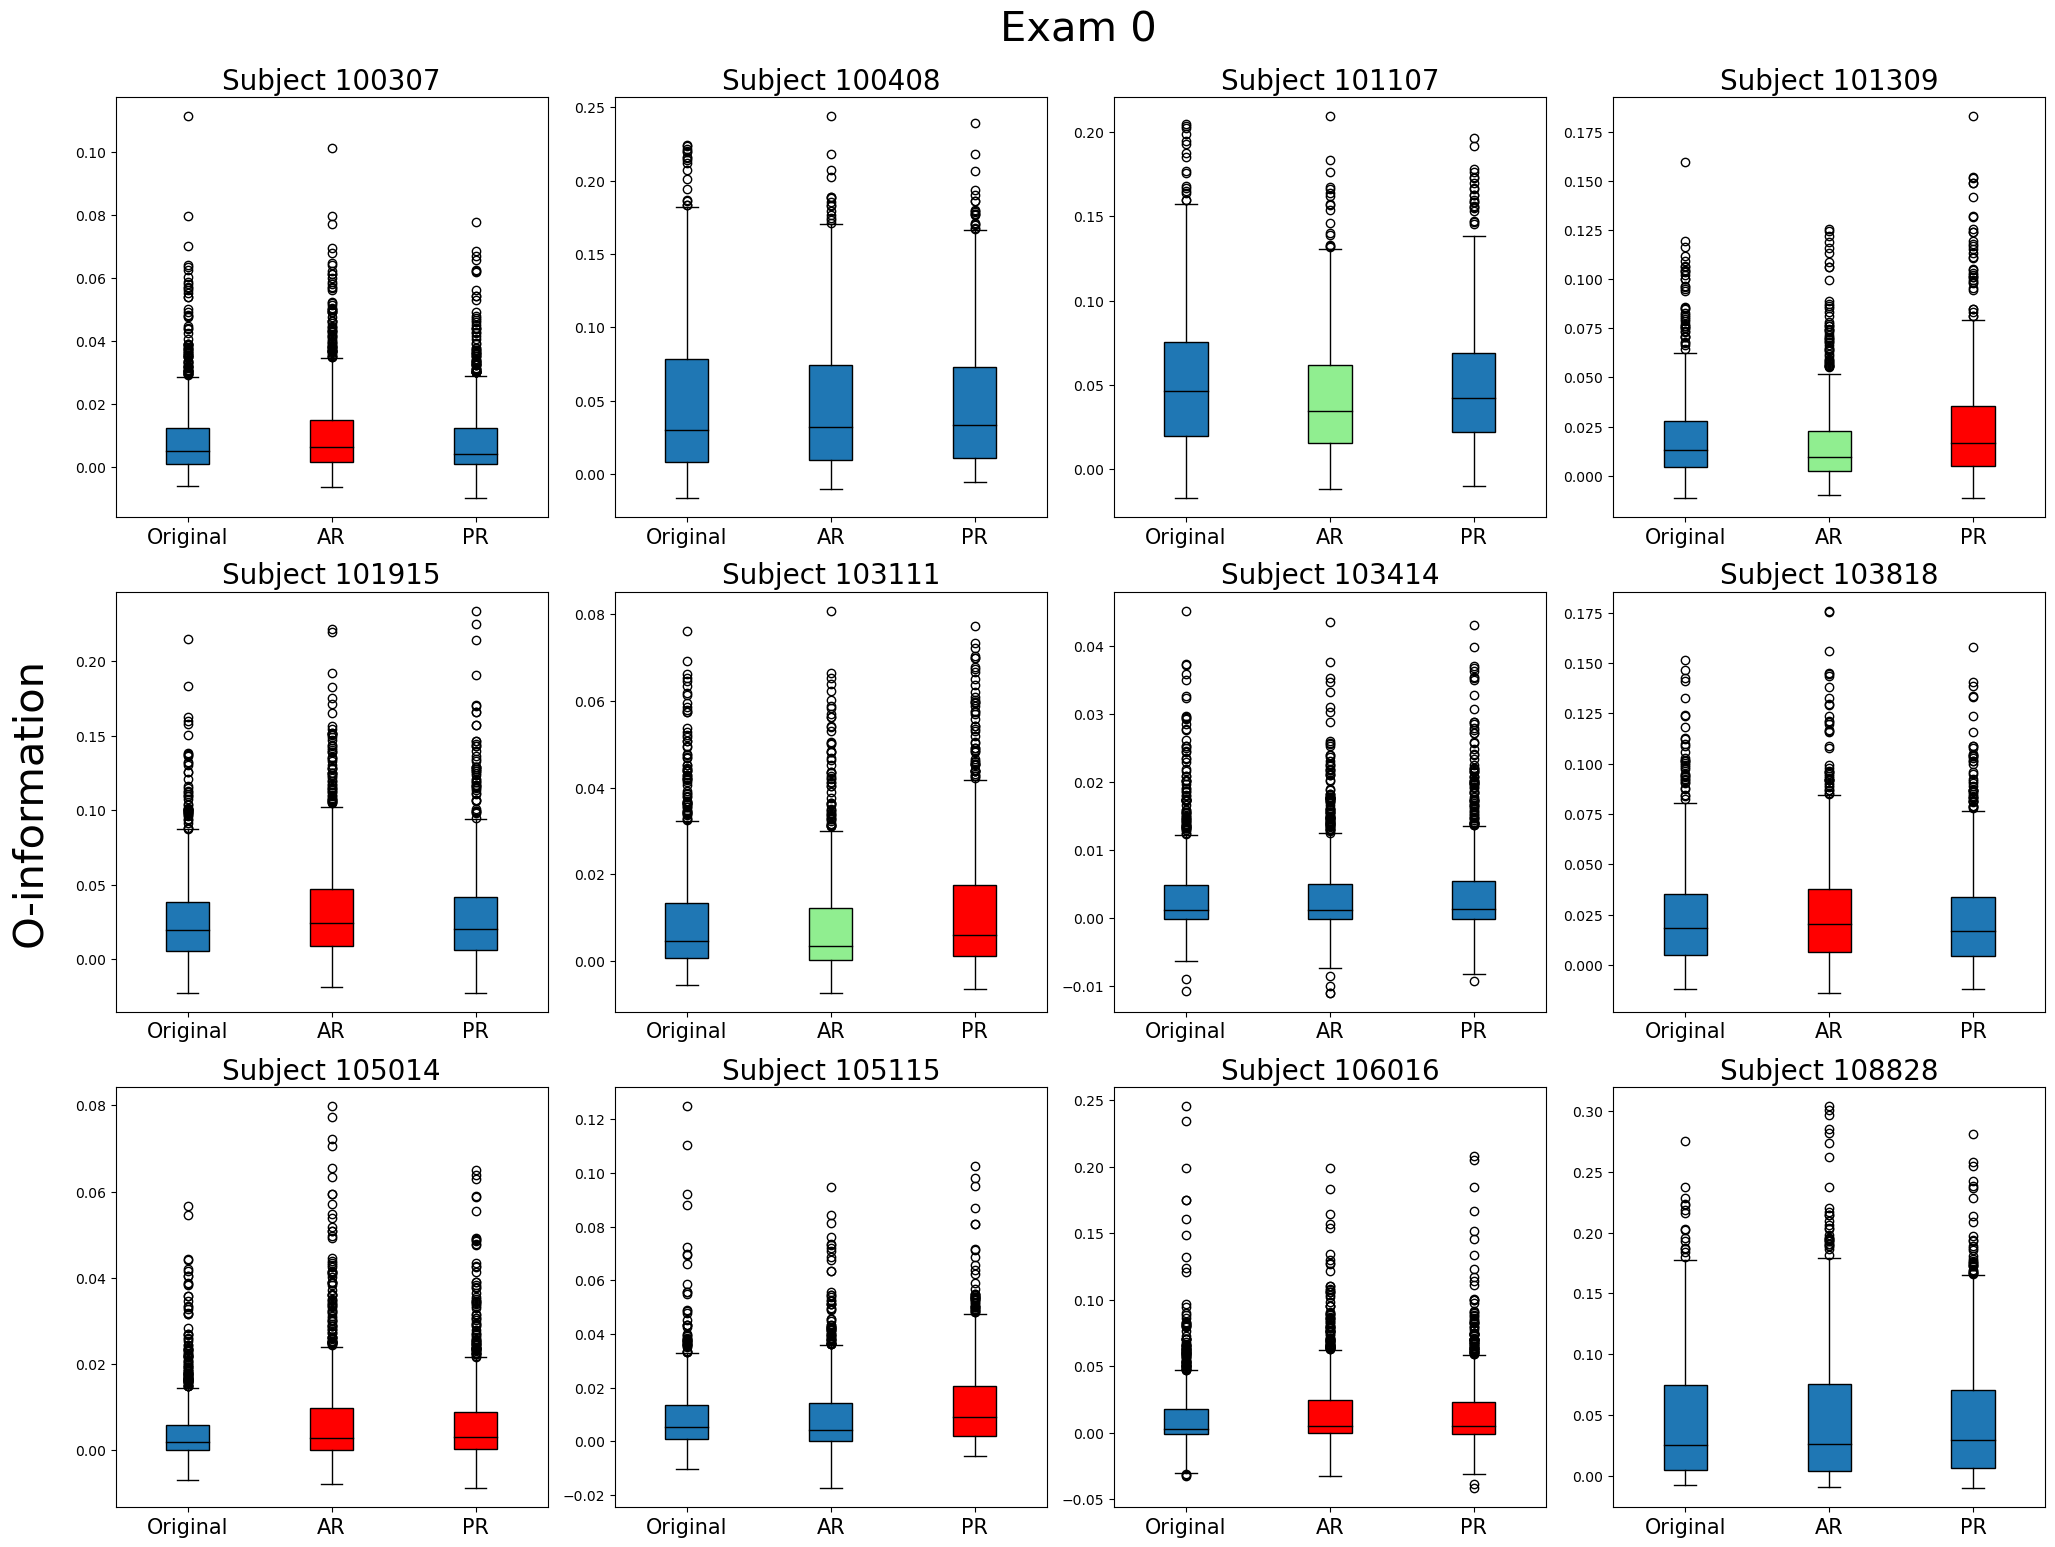

In [22]:
cols = 4
if len(subjects) % cols == 0:
    rows = len(subjects) // cols
else:
    rows = len(subjects) // cols + 1

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

for i, subject in enumerate(subjects):
    row_idx = i // cols
    col_idx = i % cols

    original, modified = np_load_o_info_triplets(subject)
    data = [original[0], modified[0], modified[1]]

    bp = axs[row_idx, col_idx].boxplot(data, patch_artist=True)

    if count_neg_0[2 * i] == 1:
        bp["boxes"][1].set(facecolor="red")

    if count_neg_0[2 * i + 1] == 1:
        bp["boxes"][2].set(facecolor="red")

    if count_pos_0[2 * i] == 1:
        bp["boxes"][1].set(facecolor="lightgreen")

    if count_pos_0[2 * i + 1] == 1:
        bp["boxes"][2].set(facecolor="lightgreen")

    for median in bp["medians"]:
        median.set_color("black")

    axs[row_idx, col_idx].set_xticks(range(1, 4))
    axs[row_idx, col_idx].set_xticklabels(["Original", "AR", "PR"], fontsize=15)

    axs[row_idx, col_idx].set_title(f"Subject {subject}", fontsize=20)

plt.tight_layout()

fig.text(-0.025, 0.5, "O-information", va="center", rotation="vertical", fontsize=30)
fig.text(0.47, 1.015, "Exam 0", va="center", fontsize=30)

plt.savefig(
    "./results/brain_results/triplets/o_info/images/boxplot_exam_0.pdf",
    dpi=600,
    bbox_inches="tight",
)

plt.show()

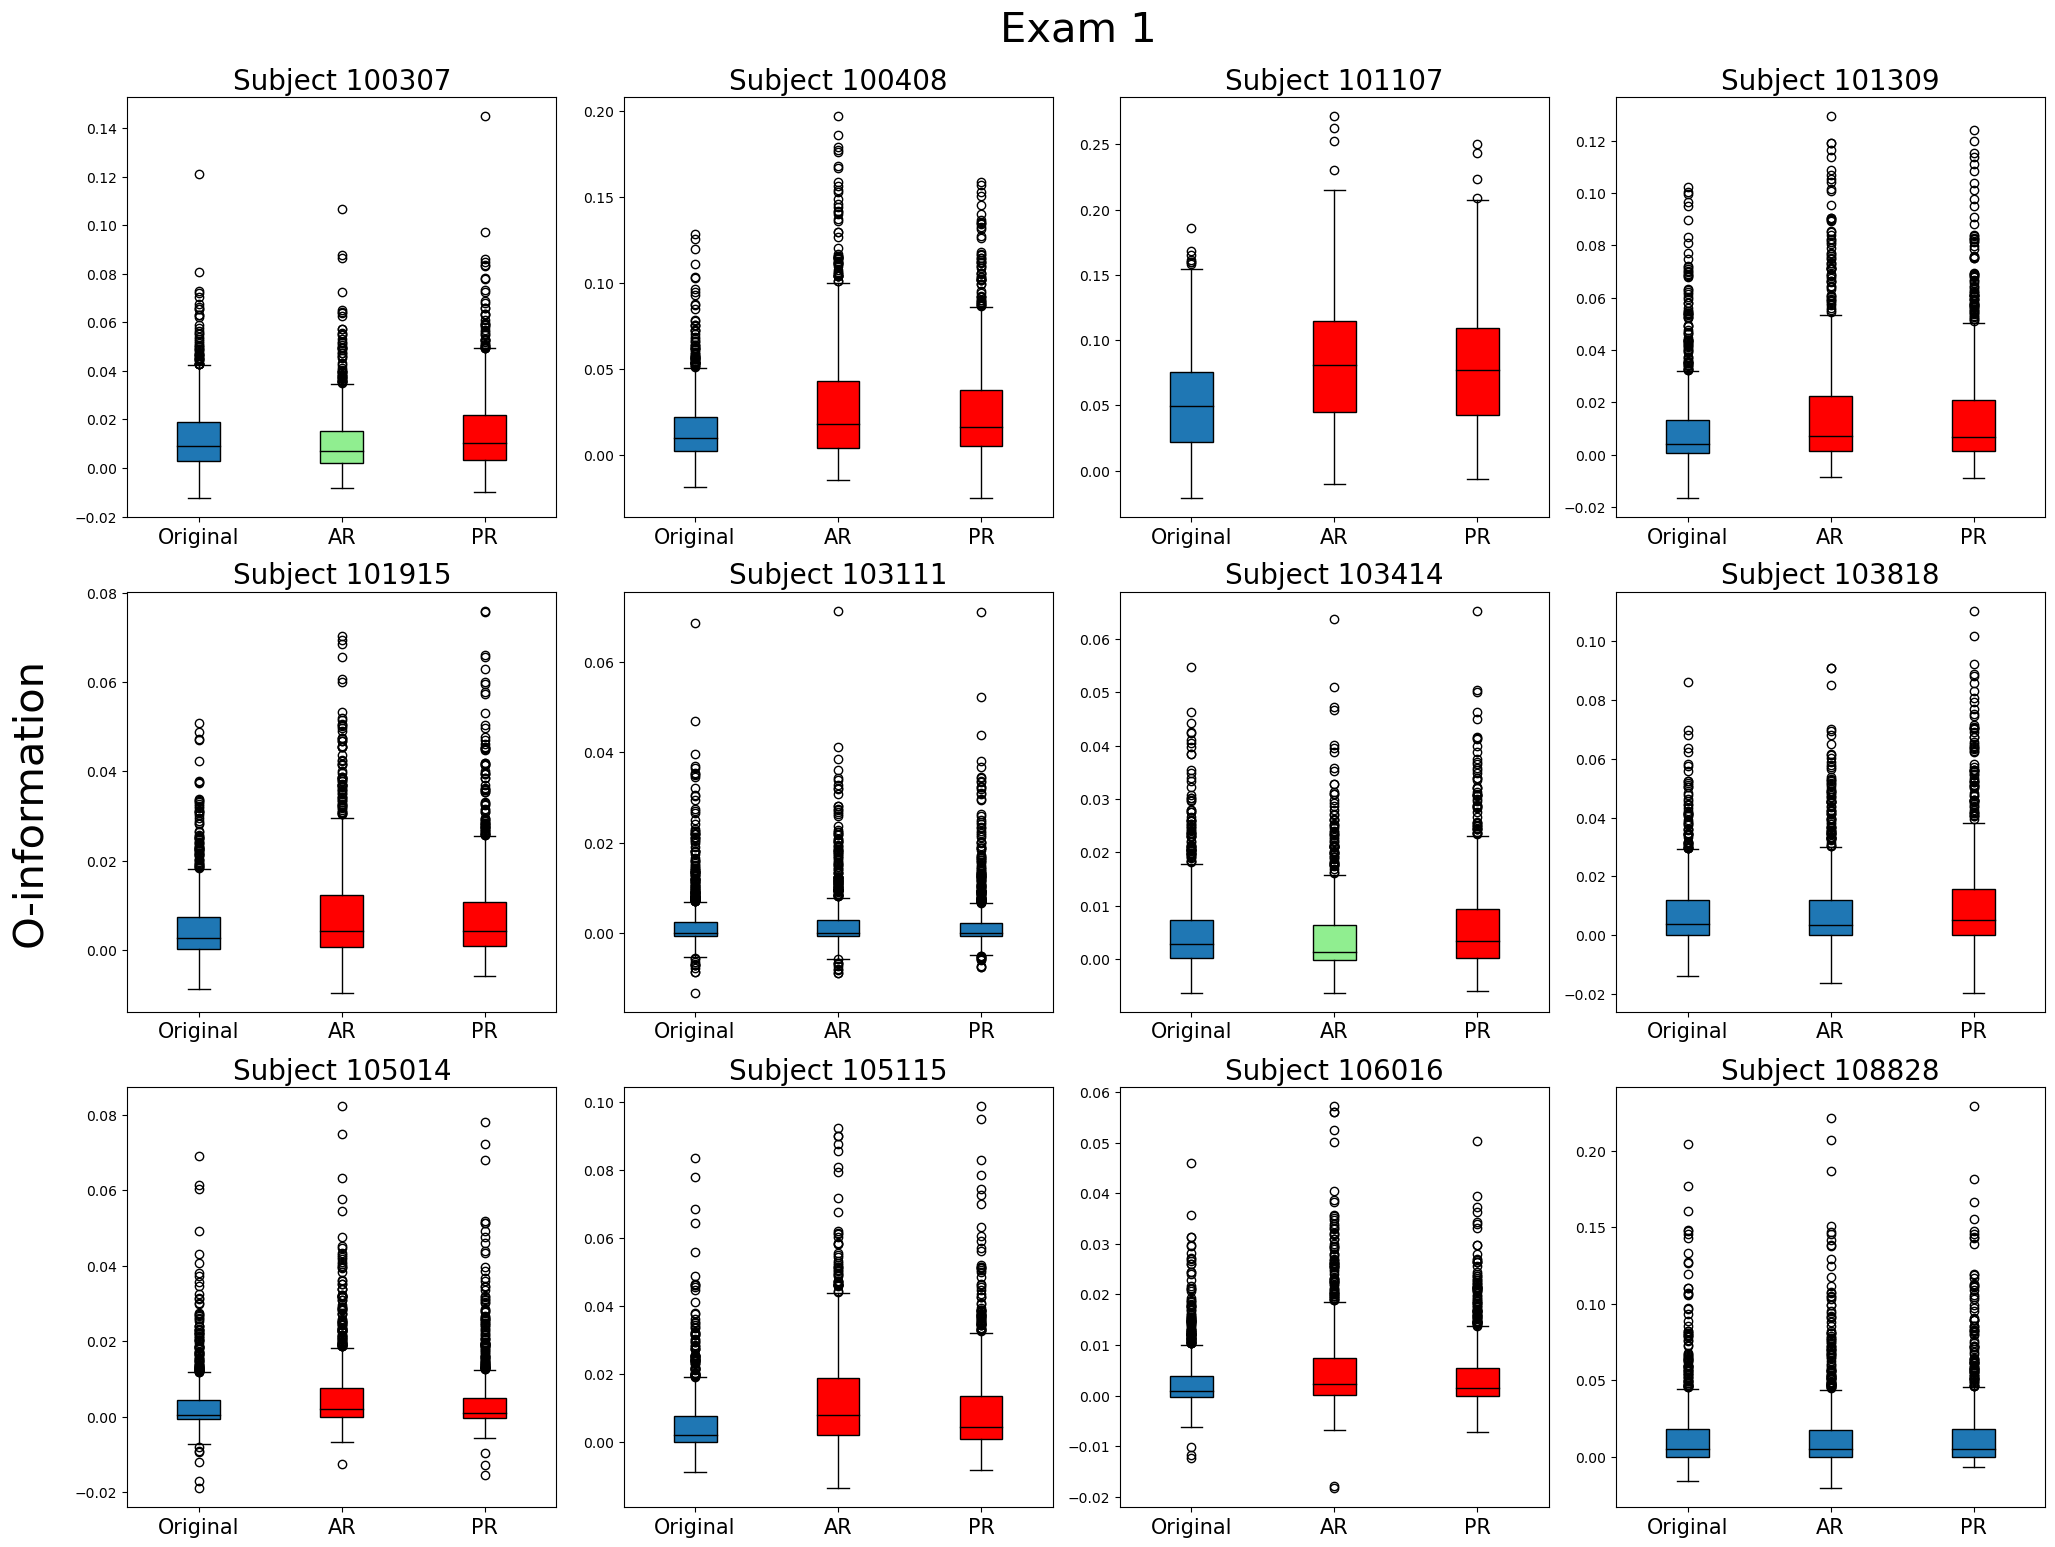

In [23]:
cols = 4
if len(subjects) % cols == 0:
    rows = len(subjects) // cols
else:
    rows = len(subjects) // cols + 1

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

for i, subject in enumerate(subjects):
    row_idx = i // cols
    col_idx = i % cols

    original, modified = np_load_o_info_triplets(subject)
    data = [original[1], modified[2], modified[3]]

    bp = axs[row_idx, col_idx].boxplot(data, patch_artist=True)

    if count_neg_1[2 * i] == 1:
        bp["boxes"][1].set(facecolor="red")

    if count_neg_1[2 * i + 1] == 1:
        bp["boxes"][2].set(facecolor="red")

    if count_pos_1[2 * i] == 1:
        bp["boxes"][1].set(facecolor="lightgreen")

    if count_pos_1[2 * i + 1] == 1:
        bp["boxes"][2].set(facecolor="lightgreen")

    for median in bp["medians"]:
        median.set_color("black")

    axs[row_idx, col_idx].set_xticks(range(1, 4))
    axs[row_idx, col_idx].set_xticklabels(["Original", "AR", "PR"], fontsize=15)

    axs[row_idx, col_idx].set_title(f"Subject {subject}", fontsize=20)

plt.tight_layout()

fig.text(-0.025, 0.5, "O-information", va="center", rotation="vertical", fontsize=30)
fig.text(0.47, 1.015, "Exam 1", va="center", fontsize=30)

plt.savefig(
    "./results/brain_results/triplets/o_info/images/boxplot_exam_1.pdf",
    dpi=600,
    bbox_inches="tight",
)

plt.show()

<a name="quadriplets"></a>
## Quadriplets

<a name="total_dyn_quadriplets"></a>
### Total dynamical O-information

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE QUADRIPLETS

# From all possible combinations of 4 columns, I randomly extract n_quadr non-repeating quadriplets
n_quadr = 5  # max 2441626


quadriplets = list(
    combinations(df_all_original_0[f"df_{subjects[0]}_original_0"].columns, 4)
)
random_quadriplets = random.sample(quadriplets, n_quadr)

# Save the variables with pickle
with open("results/brain_results/quadriplets/quadriplets.pkl", "wb") as file:
    pickle.dump((n_quadr, random_quadriplets), file)

# If I want to load the variables, I have to do:
# with open("results/brain_results/quadriplets/quadriplets.pkl", "rb") as file:
#    n_quadr, random_quadriplets = pickle.load(file)

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATA

doinfo_all_original_0 = {}
doinfo_all_AR_0 = {}
doinfo_all_PR_0 = {}

doinfo_all_original_1 = {}
doinfo_all_AR_1 = {}
doinfo_all_PR_1 = {}

for subject in subjects:
    (
        doinfo_all_original_0[f"df_{subject}_original_0"],
        doinfo_all_AR_0[f"df_{subject}_AR_0"],
        doinfo_all_PR_0[f"df_{subject}_PR_0"],
    ) = get_do_infos(
        df_all_original_0[f"df_{subject}_original_0"],
        df_all_AR_0[f"df_{subject}_AR_0"],
        df_all_PR_0[f"df_{subject}_PR_0"],
        random_quadriplets,
    )

    (
        doinfo_all_original_1[f"df_{subject}_original_1"],
        doinfo_all_AR_1[f"df_{subject}_AR_1"],
        doinfo_all_PR_1[f"df_{subject}_PR_1"],
    ) = get_do_infos(
        df_all_original_1[f"df_{subject}_original_1"],
        df_all_AR_1[f"df_{subject}_AR_1"],
        df_all_PR_1[f"df_{subject}_PR_1"],
        random_quadriplets,
    )

    np.save(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_original_exam_0.npy",
        doinfo_all_original_0[f"df_{subject}_original_0"],
    )

    np.save(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_AR_exam_0.npy",
        doinfo_all_AR_0[f"df_{subject}_AR_0"],
    )

    np.save(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_PR_exam_0.npy",
        doinfo_all_PR_0[f"df_{subject}_PR_0"],
    )

    np.save(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_original_exam_1.npy",
        doinfo_all_original_1[f"df_{subject}_original_1"],
    )

    np.save(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_AR_exam_1.npy",
        doinfo_all_AR_1[f"df_{subject}_AR_1"],
    )

    np.save(
        f"./results/brain_results/quadriplets/do_info/subject_{subject}_doinfo_PR_exam_1.npy",
        doinfo_all_PR_1[f"df_{subject}_PR_1"],
    )

<a name="results_quadriplets"></a>
### Results 

<a name="violin_plot_quadriplets"></a>
#### Violin plot

In [ ]:
titles = [
    "Original - AR (0)",
    "Original - PR (0)",
    "Original - AR (1)",
    "Original - PR (1)",
]

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE VIOLIN PLOTS

for subject in subjects:
    original, modified = np_load_quadriplets(subject)

    fig, axs = plt.subplots(2, 2, figsize=(30, 35))
    for i in range(4):
        row = i // 2
        col = i % 2
        parts = axs[row, col].violinplot(original[row], showextrema=False)
        for pc in parts["bodies"]:
            pc.set_facecolor("tab:blue")
            pc.set_edgecolor("black")
            pc.set_alpha(0.5)

        parts = axs[row, col].violinplot(modified[i], showextrema=False)
        for pc in parts["bodies"]:
            pc.set_facecolor("tab:orange")
            pc.set_edgecolor("black")
            pc.set_alpha(0.5)

        axs[row, col].set_title(titles[i], size=35)
        axs[row, col].set_ylabel(r"$d\Omega_3^{tot.}$", size=45)
        axs[row, col].legend(
            handles=[
                mpatches.Patch(color="tab:blue", label="Original", alpha=0.5),
                mpatches.Patch(color="tab:orange", label="Modified", alpha=0.5),
            ],
            fontsize=40,
        )

        axs[row, col].tick_params(axis="both", labelsize=25)

    plt.tight_layout()  # add spaces between subplots
    suptit = str(f"Subject {subject}")
    fig.suptitle(suptit, size=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])

    plt.savefig(
        f"./results/brain_results/quadriplets/images/violin/violin_subject_{subject}.pdf",
        dpi=600,
        bbox_inches="tight",
    )

    plt.show()

<a name="scatter_plot_quadriplets"></a>
#### Scatter plot

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE SCATTER PLOTS

for subject in subjects:
    original, modified = np_load_quadriplets(subject)

    fig, axs = plt.subplots(2, 2, figsize=(30, 30))
    for i in range(4):
        row = i // 2
        col = i % 2

        axs[row, col].scatter(original[row], modified[i], marker=".", s=500)
        axs[row, col].set_title(titles[i], size=35)
        axs[row, col].set_xlabel(r"$d\Omega_3^{tot. orig.}$", size=45)
        axs[row, col].set_ylabel(r"$d\Omega_3^{tot. mod.}$", size=45)

        # Bisector
        x_values = np.linspace(min(original[row]), max(original[row]), 100)
        axs[row, col].plot(x_values, x_values, color="red", linewidth=3)

        # Point (0, 0)
        axs[row, col].scatter(0, 0, color="green", marker=".", s=1800)

        axs[row, col].tick_params(axis="both", labelsize=25)

    plt.tight_layout()
    suptit = str(f"Subject {subject}")
    fig.suptitle(suptit, size=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])

    plt.savefig(
        f"./results/brain_results/quadriplets/images/scatter/scatter_subject_{subject}.pdf",
        dpi=600,
        bbox_inches="tight",
    )

    plt.show()

<a name="dataframe_quadriplets"></a>
#### Dataframe

In [ ]:
df_quadriplets = pd.DataFrame(
    columns=[
        "J-S div (O-AR, 0)",
        "J-S div (O-PR, 0)",
        "J-S div (O-AR, 1)",
        "J-S div (O-PR, 1)",
        "Pearson (O-AR, 0)",
        "Pearson (O-PR, 0)",
        "Pearson (O-AR, 1)",
        "Pearson (O-PR, 1)",
        "Spearman (O-AR, 0)",
        "p-value (O-AR, 0)",
        "Spearman (O-PR, 0)",
        "p-value (O-PR, 0)",
        "Spearman (O-AR, 1)",
        "p-value (O-AR, 1)",
        "Spearman (O-PR, 1)",
        "p-value (O-PR, 1)",
        "RBO (O-AR, 0, red)",
        "RBO (O-PR, 0, red)",
        "RBO (O-AR, 1, red)",
        "RBO (O-PR, 1, red)",
        "RBO (O-AR, 0, syn)",
        "RBO (O-PR, 0, syn)",
        "RBO (O-AR, 1, syn)",
        "RBO (O-PR, 1, syn)",
    ]
)

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATAFRAME

for subject in subjects:
    original, modified = np_load_quadriplets(subject)

    # Compute the J-S divergence
    df_quadriplets.at[subject, "J-S div (O-AR, 0)"] = JS_div(original[0], modified[0])
    df_quadriplets.at[subject, "J-S div (O-PR, 0)"] = JS_div(original[0], modified[1])
    df_quadriplets.at[subject, "J-S div (O-AR, 1)"] = JS_div(original[1], modified[2])
    df_quadriplets.at[subject, "J-S div (O-PR, 1)"] = JS_div(original[1], modified[3])

    # Compute the Pearson coefficient
    df_quadriplets.at[subject, "Pearson (O-AR, 0)"] = np.corrcoef(
        original[0], modified[0]
    )[0, 1]
    df_quadriplets.at[subject, "Pearson (O-PR, 0)"] = np.corrcoef(
        original[0], modified[1]
    )[0, 1]
    df_quadriplets.at[subject, "Pearson (O-AR, 1)"] = np.corrcoef(
        original[1], modified[2]
    )[0, 1]
    df_quadriplets.at[subject, "Pearson (O-PR, 1)"] = np.corrcoef(
        original[1], modified[3]
    )[0, 1]

    # Compute the Spearman coefficient
    spearman_coefficient, p_value = spearmanr(original[0], modified[0])
    df_quadriplets.at[subject, "Spearman (O-AR, 0)"] = spearman_coefficient
    df_quadriplets.at[subject, "p-value (O-AR, 0)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[0], modified[1])
    df_quadriplets.at[subject, "Spearman (O-PR, 0)"] = spearman_coefficient
    df_quadriplets.at[subject, "p-value (O-PR, 0)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[1], modified[2])
    df_quadriplets.at[subject, "Spearman (O-AR, 1)"] = spearman_coefficient
    df_quadriplets.at[subject, "p-value (O-AR, 1)"] = p_value
    spearman_coefficient, p_value = spearmanr(original[1], modified[3])
    df_quadriplets.at[subject, "Spearman (O-PR, 1)"] = spearman_coefficient
    df_quadriplets.at[subject, "p-value (O-PR, 1)"] = p_value

    # Compute the RBO
    # Indices from the bigger to the smaller (for RBO redundancy)
    red_original_0, red_original_1, red_AR_0, red_PR_0, red_AR_1, red_PR_1 = (
        np.argsort(-original[0]),
        np.argsort(-original[1]),
        np.argsort(-modified[0]),
        np.argsort(-modified[1]),
        np.argsort(-modified[2]),
        np.argsort(-modified[3]),
    )

    # Indices from the smaller to the bigger (for RBO synergy)
    syn_original_0, syn_original_1, syn_AR_0, syn_PR_0, syn_AR_1, syn_PR_1 = (
        np.argsort(original[0]),
        np.argsort(original[1]),
        np.argsort(modified[0]),
        np.argsort(modified[1]),
        np.argsort(modified[2]),
        np.argsort(modified[3]),
    )

    df_quadriplets.at[subject, "RBO (O-AR, 0, red)"] = rbo.RankingSimilarity(
        red_original_0, red_AR_0
    ).rbo()
    df_quadriplets.at[subject, "RBO (O-PR, 0, red)"] = rbo.RankingSimilarity(
        red_original_0, red_PR_0
    ).rbo()
    df_quadriplets.at[subject, "RBO (O-AR, 1, red)"] = rbo.RankingSimilarity(
        red_original_1, red_AR_1
    ).rbo()
    df_quadriplets.at[subject, "RBO (O-PR, 1, red)"] = rbo.RankingSimilarity(
        red_original_1, red_PR_1
    ).rbo()

    df_quadriplets.at[subject, "RBO (O-AR, 0, syn)"] = rbo.RankingSimilarity(
        syn_original_0, syn_AR_0
    ).rbo()
    df_quadriplets.at[subject, "RBO (O-PR, 0, syn)"] = rbo.RankingSimilarity(
        syn_original_0, syn_PR_0
    ).rbo()
    df_quadriplets.at[subject, "RBO (O-AR, 1, syn)"] = rbo.RankingSimilarity(
        syn_original_1, syn_AR_1
    ).rbo()
    df_quadriplets.at[subject, "RBO (O-PR, 1, syn)"] = rbo.RankingSimilarity(
        syn_original_1, syn_PR_1
    ).rbo()

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DATAFRAME

df_quadriplets.to_csv("./results/brain_results/quadriplets/result_quadriplets.csv", index=True)

<a name="summary_quadriplets"></a>
#### Summary

In [ ]:
df_quadriplets = pd.read_csv(
    "./results/brain_results/quadriplets/result_quadriplets.csv", index_col=0
)

In [ ]:
df_quadriplets

In [ ]:
threshold_JS = 0.4
threshold_Pearson = 0.6
threshold_Spearman = 0.6
threshold_RBO = 0.6

dict_subjects_quadriplets = {subject: 0 for subject in subjects}

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DICTIONARY

for subject, row in df_quadriplets.iterrows():
    for column in df_quadriplets.columns:
        if "J-S div" in column:
            if row[column] > threshold_JS:
                dict_subjects_quadriplets[subject] += 1

        elif "Pearson" in column:
            if row[column] < threshold_Pearson:
                dict_subjects_quadriplets[subject] += 1

        elif "Spearman" in column:
            if row[column] < threshold_Spearman:
                dict_subjects_quadriplets[subject] += 1

        elif "RBO" in column:
            if row[column] < threshold_RBO:
                dict_subjects_quadriplets[subject] += 1

In [ ]:
# DO NOT RUN IF YOU ALREADY HAVE THE DICTIONARY

with open("./results/brain_results/quadriplets/dict_subjects_quadriplets.pickle", "wb") as file:
    pickle.dump(dict_subjects_quadriplets, file)

In [ ]:
with open("./results/brain_results/quadriplets/dict_subjects_quadriplets.pickle", "rb") as file:
    dict_subjects_quadriplets = pickle.load(file)

In [ ]:
threshold_subjects = 12  # max 20
interesting_subjects_quadriplets = {}

for subject in subjects:
    if dict_subjects_quadriplets[subject] >= threshold_subjects:
        interesting_subjects_quadriplets[subject] = dict_subjects_quadriplets[subject]

In [ ]:
interesting_subjects_quadriplets = dict(
    sorted(interesting_subjects_quadriplets.items(), key=lambda x: x[1], reverse=True)
)

print("Subjects showing notable differences in quadriplets")
print(interesting_subjects_quadriplets)

In [ ]:
for column in df_quadriplets.columns:
    if "p-value" not in column:
        plt.figure()
        anomaly = False
        for index, row in df_quadriplets.iterrows():
            if index in interesting_subjects_quadriplets:
                plt.scatter(index, row[column], color="orange")
                anomaly = True
            else:
                plt.scatter(index, row[column], color="blue")
        plt.title(column)
        plt.xlabel("Subject")
        plt.ylabel("Value")
        if anomaly:
            plt.legend(["Anomaly", "Standard"], prop={"size": 12})
        else:
            plt.legend(["Standard"], prop={"size": 12})

        plt.savefig(
            f"./results/brain_results/quadriplets/images/summary/summary_{column}.pdf",
            dpi=600,
            bbox_inches="tight",
        )

        plt.show()

<a name="a_posteriori_quadriplets"></a>
#### A posteriori

In [ ]:
dict_columns_quadriplets = {column: 0 for column in df_quadriplets.columns if not column.startswith('p-value')}

for subject, row in df_quadriplets.iterrows():
    for column in df_quadriplets.columns:
        if "J-S div" in column:
            if row[column] > threshold_JS:
                dict_columns_quadriplets[column] += 1

        elif "Pearson" in column:
            if row[column] < threshold_Pearson:
                dict_columns_quadriplets[column] += 1

        elif "Spearman" in column:
            if row[column] < threshold_Spearman:
                dict_columns_quadriplets[column] += 1

        elif "RBO" in column:
            if row[column] < threshold_RBO:
                dict_columns_quadriplets[column] += 1

dict_columns_quadriplets

In [ ]:
threshold_columns = len(subjects) / 3
interesting_columns_quadriplets = {}

for column in df_quadriplets.columns:
    if dict_columns_quadriplets[column] >= threshold_columns:
        interesting_columns_quadriplets[column] = dict_columns_quadriplets[column]

interesting_columns_quadriplets

<a name="comparison_triplets_quadriplets"></a>
## Comparison Triplets vs Quadriplets

Are there any subject that interesting_subjects_triplets and interesting_subjects_quadriplets have in common?

In [ ]:
common_subjects = set(interesting_subjects_triplets.keys()) & set(
    interesting_subjects_quadriplets.keys()
)

if len(common_subjects) > 0:
    print("Dictionaries have subjects in common:")
    for key in common_subjects:
        print(key)
else:
    print("Dictionaries do not have subjects in common.")

Are there any column that interesting_columns_triplets and interesting_columns_quadriplets have in common?

In [ ]:
common_columns = set(interesting_columns_triplets.keys()) & set(
    interesting_columns_quadriplets.keys()
)

if len(common_columns) > 0:
    print("Dictionaries have columns in common:")
    for key in common_columns:
        print(key)
else:
    print("Dictionaries do not have columns in common.")

<a name="o_info"></a>
## O-information